In [1]:
import numpy as np
from scipy.special import binom
import matplotlib.pyplot as plt
bernstein = lambda n, k, t: binom(n,k)* t**k * (1.-t)**(n-k)
def bezier(points, num=200):
    N = len(points)
    t = np.linspace(0, 1, num=num)
    curve = np.zeros((num, 2))
    for i in range(N):
        curve += np.outer(bernstein(N - 1, i, t), points[i])
    return curve
class Segment():
    def __init__(self, p1, p2, angle1, angle2, **kw):
        self.p1 = p1; self.p2 = p2
        self.angle1 = angle1; self.angle2 = angle2
        self.numpoints = kw.get("numpoints", 100)
        r = kw.get("r", 0.3)
        d = np.sqrt(np.sum((self.p2-self.p1)**2))
        self.r = r*d
        self.p = np.zeros((4,2))
        self.p[0,:] = self.p1[:]
        self.p[3,:] = self.p2[:]
        self.calc_intermediate_points(self.r)
    def calc_intermediate_points(self,r):
        self.p[1,:] = self.p1 + np.array([self.r*np.cos(self.angle1),
                                    self.r*np.sin(self.angle1)])
        self.p[2,:] = self.p2 + np.array([self.r*np.cos(self.angle2+np.pi),
                                    self.r*np.sin(self.angle2+np.pi)])
        self.curve = bezier(self.p,self.numpoints)
def get_curve(points, **kw):
    segments = []
    for i in range(len(points)-1):
        seg = Segment(points[i,:2], points[i+1,:2], points[i,2],points[i+1,2],**kw)
        segments.append(seg)
    curve = np.concatenate([s.curve for s in segments])
    return segments, curve
def ccw_sort(p):
    d = p-np.mean(p,axis=0)
    s = np.arctan2(d[:,0], d[:,1])
    return p[np.argsort(s),:]
def get_bezier_curve(a, rad=0.2, edgy=0):
    """ given an array of points *a*, create a curve through
    those points. 
    *rad* is a number between 0 and 1 to steer the distance of
          control points.
    *edgy* is a parameter which controls how "edgy" the curve is,
           edgy=0 is smoothest."""
    p = np.arctan(edgy)/np.pi+.5
    a = ccw_sort(a)
    a = np.append(a, np.atleast_2d(a[0,:]), axis=0)
    d = np.diff(a, axis=0)
    ang = np.arctan2(d[:,1],d[:,0])
    f = lambda ang : (ang>=0)*ang + (ang<0)*(ang+2*np.pi)
    ang = f(ang)
    ang1 = ang
    ang2 = np.roll(ang,1)
    ang = p*ang1 + (1-p)*ang2 + (np.abs(ang2-ang1) > np.pi )*np.pi
    ang = np.append(ang, [ang[0]])
    a = np.append(a, np.atleast_2d(ang).T, axis=1)
    s, c = get_curve(a, r=rad, method="var")
    x,y = c.T
    return x,y, a
def get_random_points(n=5, scale=0.8, mindst=None, rec=0):
    """ create n random points in the unit square, which are *mindst*
    apart, then scale them."""
    mindst = mindst or .7/n
    a = np.random.rand(n,2)
    d = np.sqrt(np.sum(np.diff(ccw_sort(a), axis=0), axis=1)**2)
    if np.all(d >= mindst) or rec>=200:
        return a*scale
    else:
        return get_random_points(n=n, scale=scale, mindst=mindst, rec=rec+1)


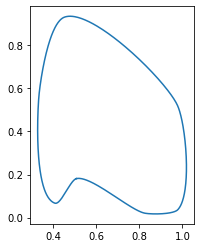

In [51]:
fig, ax = plt.subplots()
ax.set_aspect("equal")
rad = 0.2
edgy = 0.05
for c in np.array([[0,0], [0,1], [1,0], [1,1]]):
    a = get_random_points(n=7, scale=1) + c
    x,y, _ = get_bezier_curve(a,rad=rad, edgy=edgy)
    plt.plot(x,y)
    if(True): break
plt.show()

In [52]:
x_init = x
y_init = y

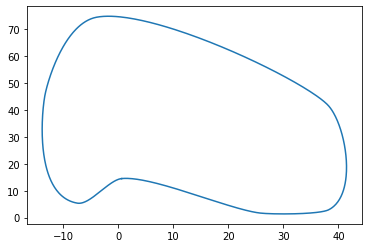

In [54]:
a = 0
b = 1

# Target range [c, d]
c = -40
d = 40

# Generate some example points

# Map the points to the target range
x = ((x_init - a) * (d - c) / (b - a)) + c

a = 0
b = 1

# Target range [c, d]
c = 0
d = 80

# Generate some example points

# Map the points to the target range
y = ((y_init - a) * (d - c) / (b - a)) + c

plt.plot(x,y)
#plt.plot(c1[:,0], c1[:,1])

In [55]:
c1 = []
for i in range(200):
    c1.append(np.array([x[i], y[i] + 10]))

c1 = np.array(c1)
c1.shape


(200, 2)

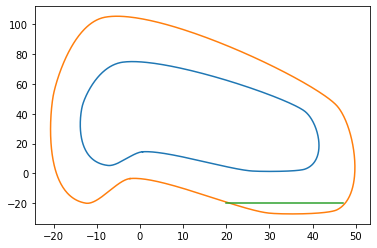

In [66]:
center_x = np.mean(x)
center_y = np.mean(y)

# Set the scaling factor
scaling_factor = 1.5 # Adjust this value to control the expansion

# Scale each point with respect to the center
x_out = center_x + 0.85*scaling_factor * (x - center_x)
y_out = center_y - 8 + 1.2*scaling_factor * (y - center_y)


xx = np.zeros(10)
for i in range(10):
    xx[i] = 20 + 3*i
yy = np.zeros(10)
for i in range(10):
    yy[i] = -20
plt.plot(x,y)
plt.plot(x_out,y_out)
plt.plot(xx, yy)

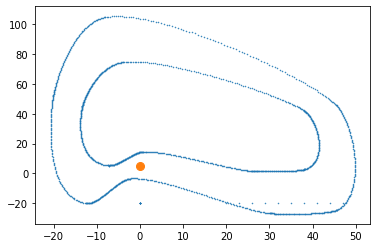

In [77]:
c1 = np.zeros((700,2))
c1[:, 0] = x
c1[:,1] = y
c2 = np.zeros((700,2))
c2[:, 0] = x_out
c2[:,1] = y_out
c2 = list(c2)
c1 = list(c1)
for i in range(10):
    c2.append(np.array([xx[i], yy[i]]))
    c1.append(np.array([0, -20]))

c1 = np.array(c1)
c2 = np.array(c2)

cones = np.concatenate([c1,c2])

cones = cones[cones[:, 0].argsort()]
c1 = c1[c1[:, 0].argsort()]
c2 = c2[c2[:, 0].argsort()]

plt.plot(cones[:, 0], cones[:, 1], marker='o', linestyle='None', markersize=0.5)
plt.plot(0, 5, marker='o', linestyle='None', markersize=8)

In [78]:
import importlib
imported_module1 = importlib.import_module("dynamic_bicycle_model")
importlib.reload(imported_module1)
imported_module2 = importlib.import_module("kinematic_bicycle_model")
importlib.reload(imported_module2)
imported_module3 = importlib.import_module("MPPI_K")
importlib.reload(imported_module3)
imported_module4 = importlib.import_module("MPPI_D")
importlib.reload(imported_module4)

import numpy as np
import matplotlib.pyplot as plt
from dynamic_bicycle_model import DBM_Vehicle
from MPPI_K import MPPI_Kinematic
from MPPI_D import MPPI_Dynamic
from kinematic_bicycle_model import KBM_Vehicle

[INFO] delta_t : 0.05[s] , sim_steps : 600[steps], total_sim_time : 30.00[s]


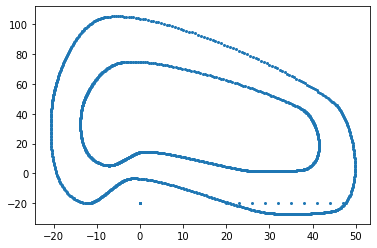

Time: 0.00[s], x=+0.000[m], y=+5.000[m], yaw=+0.000[rad], vx=+5.000[m/s], vy=+0.000[m/s], steer= -0.21[rad], accel= +0.37[m/s^2]
Time: 0.05[s], x=+0.250[m], y=+5.000[m], yaw=+0.000[rad], vx=+4.996[m/s], vy=-0.104[m/s], steer= -0.23[rad], accel= +0.63[m/s^2]
Time: 0.10[s], x=+0.500[m], y=+4.995[m], yaw=-0.004[rad], vx=+5.007[m/s], vy=-0.177[m/s], steer= -0.26[rad], accel= +0.74[m/s^2]
Time: 0.15[s], x=+0.750[m], y=+4.985[m], yaw=-0.013[rad], vx=+5.021[m/s], vy=-0.235[m/s], steer= -0.36[rad], accel= +0.96[m/s^2]
Time: 0.20[s], x=+1.001[m], y=+4.970[m], yaw=-0.024[rad], vx=+5.025[m/s], vy=-0.312[m/s], steer= -0.39[rad], accel= +1.36[m/s^2]
Time: 0.25[s], x=+1.252[m], y=+4.948[m], yaw=-0.041[rad], vx=+5.049[m/s], vy=-0.371[m/s], steer= -0.45[rad], accel= +1.42[m/s^2]
Time: 0.30[s], x=+1.503[m], y=+4.920[m], yaw=-0.061[rad], vx=+5.065[m/s], vy=-0.426[m/s], steer= -0.33[rad], accel= +1.64[m/s^2]
Time: 0.35[s], x=+1.755[m], y=+4.883[m], yaw=-0.086[rad], vx=+5.134[m/s], vy=-0.405[m/s], steer= 

In [79]:
# Dynamic 
##############################################################

# simulation settings
delta_t = 0.05 # [sec]
sim_steps = 600 # [steps]
print(f"[INFO] delta_t : {delta_t:.2f}[s] , sim_steps : {sim_steps}[steps], total_sim_time : {delta_t*sim_steps:.2f}[s]")

# load and visualize reference path
#plt.plot(c1[:, 0], c1[:, 1], linestyle='--')
plt.plot(cones[:, 0], cones[:, 1],  marker='o', linestyle='None', markersize=2)
#plt.plot(c2[:, 0], c2[:, 1], linestyle='--')
plt.show()

# initialize a vehicle as a control target
vehicle = DBM_Vehicle(
    delta_t = 0.05,
    l_f = 1.1, # [m]
    l_r = 1.4, # [m]
    mass = 1000.0, # [kg]
    I_z = 1300.0, # [kg*m^2]
    C_f = 5000.0 * 2.0, # [N/rad]
    C_r = 6000.0 * 2.0, # [N/rad]
    max_steer_abs=0.523, # [rad]
    max_accel_abs=2.000, # [m/s^2]
    input_map = (c1, c2),
    cones = cones,
)

vehicle.reset(
    init_state = np.array([0.0, 5.0, 0.0, 5.0, 0.0, 0.0]), # [x[m], y[m], yaw[rad], vx[m/s], vy[m/s], omega[rad/s]]
)
vehicle_trajectory = np.array([vehicle.get_state()[:2]])

# initialize a mppi controller for the vehicle
mppi = MPPI_Dynamic(
    delta_t = 0.05,
    l_f = 1.1, # [m]
    l_r = 1.4, # [m]
    mass = 1000.0, # [kg]
    I_z = 1300.0, # [kg*m^2]
    C_f = 5000.0 * 2.0, # [N/rad]
    C_r = 6000.0 * 2.0, # [N/rad]
    max_steer_abs =  0.523, # [rad]
    max_accel_abs = 2.000, # [m/s^2]
    horizon_step_T = 80, # [steps]
    number_of_samples_K = 600, # [samples]
    param_exploration = 0.0,
    param_lambda = 100.0,
    param_alpha = 0.98,
    sigma = np.array([[0.25, 0.0], [0.0, 1.0]]),
    stage_cost_weight = np.array([200.0, 500.0, 1.0, 20.0]), # weight for [x, y, yaw, v]
    terminal_cost_weight = np.array([200.0, 500.0, 1.0, 20.0]), # weight for [x, y, yaw, v]
    visualze_sampled_trajs = True,
    input_map = (c1, c2),
    cones = cones
)

# simulation loop
train_model_data = []
state = []
for i in range(sim_steps):

    # get current state of vehicle
    current_state = vehicle.get_state()
    if(i > 0): train_model_data.append((action, prev_state, current_state))

    # try:
    #     # calculate input force with MPPI
    #     optimal_input, optimal_input_sequence, optimal_traj, sampled_traj_list = mppi.calc_control_input(
    #         observed_x = current_state
    #     )
    # except IndexError as e:
    #     # the vehicle has reached the end of the reference path
    #     print("[ERROR] IndexError detected. Terminate simulation.")
    #     break

    # calculate input force with MPPI
    optimal_input, optimal_input_sequence, optimal_traj, sampled_traj_list = mppi.calc_control_input(
        observed_x = current_state
    )
    # print current state and input force
    print(f"Time: {i*delta_t:>2.2f}[s], x={current_state[0]:>+3.3f}[m], y={current_state[1]:>+3.3f}[m], yaw={current_state[2]:>+3.3f}[rad], vx={current_state[3]:>+3.3f}[m/s], vy={current_state[4]:>+3.3f}[m/s], steer={optimal_input[0]:>+6.2f}[rad], accel={optimal_input[1]:>+6.2f}[m/s^2]")
    
    #if(current_state[0] > 24 or current_state[0] < -12): break
    action = optimal_input
    prev_state = current_state
    # update states of vehicle
    vehicle.update(u=optimal_input, delta_t=delta_t, vehicle_traj=vehicle_trajectory, optimal_traj=optimal_traj[:, 0:2], sampled_traj_list=sampled_traj_list[:, :, 0:2])
    vehicle_trajectory = np.vstack((vehicle_trajectory, vehicle.get_state()[:2])) # record vehicle trajectory
    state.append(current_state)
# show animation
#vehicle.show_animation(interval_ms=int(delta_t * 1000))
    
# save animation
vehicle.save_animation("mppi_test_map3_large_T.mp4", interval=int(delta_t * 1000), movie_writer="ffmpeg") # ffmpeg is required to write mp4 file

In [56]:
vehicle.save_animation("mppi_test_map2_large_T.mp4", interval=int(delta_t * 1000), movie_writer="ffmpeg") # ffmpeg is required to write mp4 file

Done.
